# Data Import

In [60]:
# import os, pandas as pd

# # Add asset from file system

# print(os.environ['DSX_PROJECT_DIR']+'/datasets/filename')

In [61]:
#Code to install imbalanced-learn. Credits: Ernest

# 1. Download imbalanced-learn from https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl 
# 2. Add it to the part where we add datasets

# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/imbalanced_learn-0.4.3-py3-none-any.whl'

# Install missingno
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/missingno-0.4.1-py3-none-any.whl'

# Install mlxtend
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/mlxtend-0.15.0.0-py2.py3-none-any.whl'

In [62]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm as cm
import matplotlib.patches as mpatches # plot t-SNE
import missingno as msno

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE # t-SNE

from mlxtend.feature_selection import SequentialFeatureSelector as sfs # feature selection

import seaborn as sns 

from imblearn.over_sampling import SMOTE

from scipy import stats
from scipy.stats import norm
import time # t-SNE model

In [63]:
# #Code to import dataset
# df = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/creditcard-training.csv')
# df.head()

In [64]:
df_raw = pd.read_csv('data/creditcard-training.csv')

# Data Exploration

In [65]:
# Get shape
df_raw.shape

(227844, 32)

In [66]:
# Print head
df_raw.head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [67]:
# Get basic statistics about the dataset
df_raw.describe()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
count,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227817.000000,227785.000000,227844.000000,...,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000
mean,79042.504749,90.825317,0.001830,0.049116,-0.005509,0.015160,-0.022870,-0.007268,0.009942,-0.005657,...,0.030540,-0.026843,0.003986,0.027511,0.032867,0.016712,-0.045001,0.076274,-0.001708,0.002219
std,39505.785991,250.504249,0.042742,0.933915,0.885633,0.874173,0.842786,0.820008,0.779124,0.761744,...,1.321420,1.228243,1.209610,8.652541,0.965725,1.019592,1.055865,1.033516,1.093933,1.123424
min,0.000000,0.000000,0.000000,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,...,-26.160506,-43.557242,-73.216718,-14.999725,-19.214325,-5.791881,-18.683715,-4.797473,-24.588262,-13.434066
25%,47694.000000,6.000000,0.000000,-0.543185,-0.478638,-0.457550,-0.514930,-0.478224,-0.202767,-0.225600,...,-0.731719,-0.568948,-0.195151,-7.466957,-0.386010,-0.651170,-0.453237,-0.682527,-0.522697,-0.662053
50%,73261.000000,23.400000,0.000000,0.120841,0.059919,-0.045765,-0.025810,-0.006006,-0.051034,-0.034863,...,-0.237643,0.009785,0.033492,0.044266,0.067860,-0.001631,0.118528,0.030157,-0.093071,-0.067951
75%,120396.000000,79.990000,0.000000,0.724566,0.528866,0.410328,0.476318,0.468337,0.145096,0.168401,...,0.432330,0.532569,0.332266,7.521777,0.509023,0.686509,0.611637,0.835856,0.456881,0.612866
max,145245.000000,19656.530000,1.000000,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,...,22.529298,36.877368,20.007208,14.999989,10.526766,4.569009,7.848392,12.018913,23.745136,15.594995


In [68]:
# Rename the Fraud column
df_raw = df_raw.rename( {'Fraud? (1: Fraud, 0:  No Fraud)' : 'Fraud'}, axis=1)
df_raw.head()

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [69]:
# Get NAs 
df_raw[df_raw.isnull().any(axis=1)].head()

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
10,10,7.80,0,0.230930,0.031967,0.253415,0.854344,NaN,-0.387226,-0.009302,...,-0.629152,-1.423236,0.048456,-13.640428,-0.095045,-0.513947,-0.671440,1.199644,1.626659,-1.720408
16,12,12.99,0,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,NaN,-0.024612,...,0.288069,-0.586057,0.189380,8.579468,-0.468647,0.708380,0.936708,-0.450311,-0.267975,0.782333
25,22,26.43,0,-0.211668,-0.333321,0.010751,-0.488473,0.505751,NaN,-0.403639,...,-0.959537,0.543985,-0.104627,-10.985595,-0.279797,-0.655233,-0.180523,-0.856566,0.149451,0.475664
28,23,33.00,0,0.076804,-1.405919,0.775592,-0.942889,NaN,0.097308,0.077237,...,-0.200331,0.740228,-0.029247,-5.123601,-0.086324,0.635954,0.786796,-0.012142,-0.346188,-0.593392
42,33,14.80,0,0.235545,-1.347811,0.504648,-0.798405,0.759710,NaN,-0.087329,...,0.119168,0.850893,-0.176267,5.560997,-0.365439,0.481917,0.398299,-0.387003,0.148455,-0.243501


# Exploratory Data Analysis for Outlier Detection

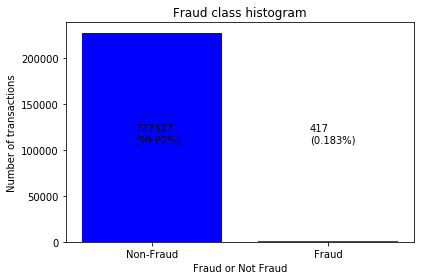

In [70]:
# Checking the Target Classes

plt.bar(['Non-Fraud','Fraud'], df_raw['Fraud'].value_counts(), color=['b','r'])
plt.title("Fraud class histogram")
plt.xlabel('Fraud or Not Fraud')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df_raw['Fraud'].value_counts()[0], 
                                         df_raw['Fraud'].value_counts()[0]/df_raw['Fraud'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df_raw['Fraud'].value_counts()[1], 
                                         df_raw['Fraud'].value_counts()[1]/df_raw['Fraud'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

The historgram shows that there is a need for resampling 

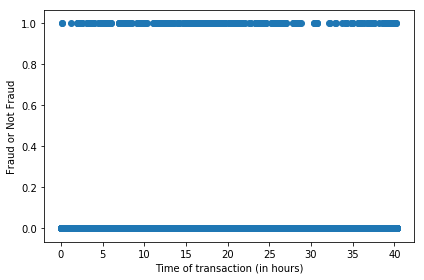

In [71]:
plt.scatter(df_raw['Seconds since reference time']/(60*60), df_raw['Fraud'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Fraud or Not Fraud')

plt.tight_layout()
plt.show()

The "Seconds since reference time" variable isn't a good predictor for frauds. As seen above, the pattern for both non-fradulent and fraudulent transactions seems to be random regarding the hour of the day.

### Looking at the entire dataset

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  25355  (11.13%)


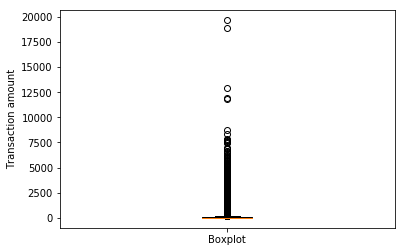

In [72]:
plt.boxplot(df_raw['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df_raw[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

The interquartile range method found 25355 outliers, which represents 11.13% of the observations. Removing them from the dataset would be a bad idea due to the loss of a large amount of information for the machine learning models.

In [73]:
df_raw[df_raw['Fraud']==1].where(df_raw['Amount']>upper_bound).count()['Amount']

75

In addition to that, only 75 out of 25355 outliers are classified as frauds.

Now we look at the concentration non-fraudulent and fraudulent transactions.

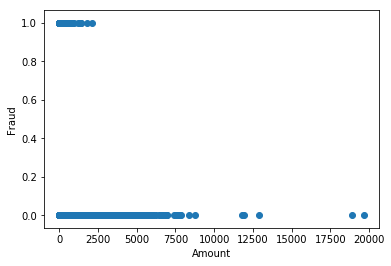

In [74]:
plt.scatter(df_raw['Amount'], df_raw['Fraud'])
plt.xlabel('Amount')
plt.ylabel('Fraud')
plt.show()

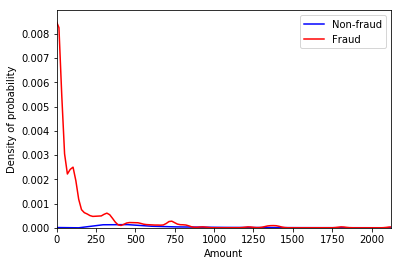

In [75]:
target_0 = df_raw.loc[df_raw['Fraud'] == 0]
target_1 = df_raw.loc[df_raw['Fraud'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(df_raw[df_raw['Fraud']==1]['Amount']))
ax2.set_xlim(0, max(df_raw[df_raw['Fraud']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.show()

Fraudulent transactions are highly concentrated at smaller values when compared to non-fraudulent transactions.

### Scaling

Since the value of amount and time have a very different scale from the rest, we should consider normalising the columns "Amount" and "Seconds since reference time"

In [76]:
df = df_raw.copy()

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = StandardScaler().fit_transform(df['Seconds since reference time'].values.reshape(-1, 1))
df = df.drop(['Amount'],axis=1)
df.head()
df = df.drop(['Seconds since reference time'],axis=1)

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Looking at detailed Features

In [77]:
#Information on Column Types, No of Null Values, Min, Max 
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Column Type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
tab_info=tab_info.append(pd.DataFrame(df.min()).T.rename(index={0:'min value (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.max()).T.rename(index={0:'max value (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.max()-df.min()).T.rename(index={0:'range (nb)'}))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(tab_info)

                  Fraud Feature 1 Feature 2 Feature 3 Feature 4  Feature 5  \
Column Type       int64   float64   float64   float64   float64    float64   
null values (nb)      0         0         0         0         0         27   
null values (%)       0         0         0         0         0  0.0118502   
min value (nb)        0  -4.49894  -14.1299  -25.1628  -9.49875   -7.21353   
max value (nb)        1   5.82565   8.28989   9.25353   5.04107    5.59197   
range (nb)            1   10.3246   22.4197   34.4163   14.5398    12.8055   

                  Feature 6 Feature 7 Feature 8 Feature 9 Feature 10  \
Column Type         float64   float64   float64   float64    float64   
null values (nb)         59         0         0         0          0   
null values (%)   0.0258949         0         0         0          0   
min value (nb)     -28.0096  -34.8304  -10.9331  -44.8077   -2.83663   
max value (nb)      39.4209   27.2028   10.5031   19.0029    4.02287   
range (nb)          6

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


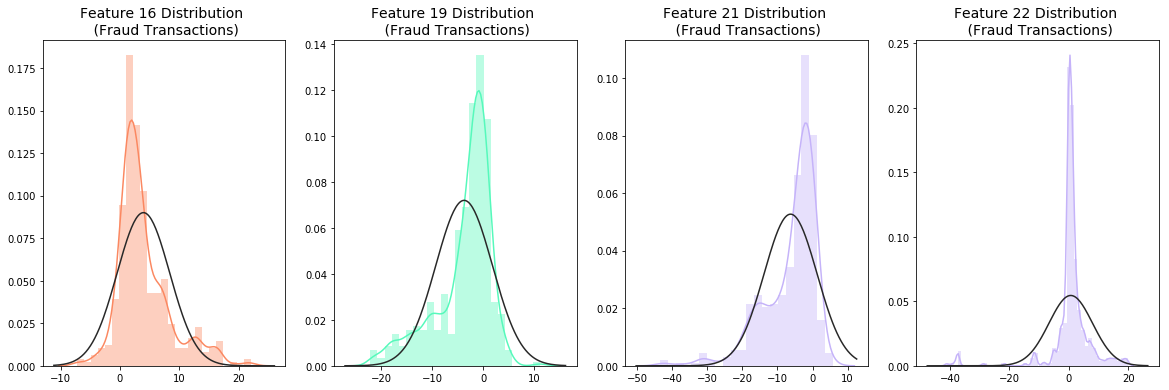

In [78]:
#Anomaly Detection 

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v7_fraud_dist = df['Feature 16'].loc[df['Fraud'] == 1].values
sns.distplot(v7_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Feature 16 Distribution \n (Fraud Transactions)', fontsize=14)

v16_fraud_dist = df['Feature 19'].loc[df['Fraud'] == 1].values
sns.distplot(v16_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Feature 19 Distribution \n (Fraud Transactions)', fontsize=14)

v21_fraud_dist = df['Feature 21'].loc[df['Fraud'] == 1].values
sns.distplot(v21_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Feature 21 Distribution \n (Fraud Transactions)', fontsize=14)

v22_fraud_dist = df['Feature 22'].loc[df['Fraud'] == 1].values
sns.distplot(v22_fraud_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Feature 22 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

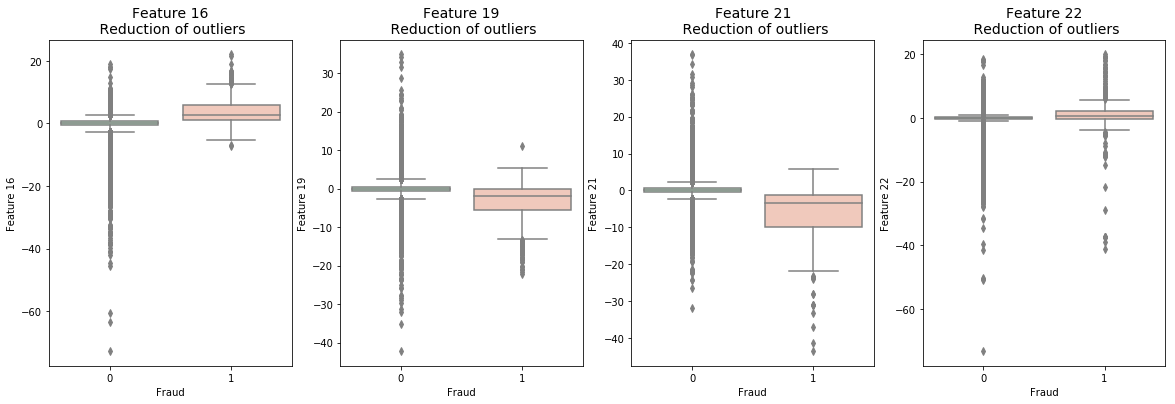

In [79]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']

# Feature 16
sns.boxplot(x="Fraud", y="Feature 16", data=df,ax=ax1, palette=colors)
ax1.set_title("Feature 16\n Reduction of outliers", fontsize=14)

# Feature 19
sns.boxplot(x="Fraud", y="Feature 19", data=df, ax=ax2, palette=colors)
ax2.set_title("Feature 19\n Reduction of outliers", fontsize=14)

# Feature 21
sns.boxplot(x="Fraud", y="Feature 21", data=df, ax=ax3, palette=colors)
ax3.set_title("Feature 21\n Reduction of outliers", fontsize=14)

# Feature 22
sns.boxplot(x="Fraud", y="Feature 22", data=df, ax=ax4, palette=colors)
ax4.set_title("Feature 22\n Reduction of outliers", fontsize=14)


plt.show()

# Handle Missing Values

There are missing values so we will use Sklearn Imputer to impute

In [80]:
df.head()

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime
0,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,...,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787,0.234706,-2.000787
1,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,...,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425,-0.351832,-2.000787
2,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,...,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654,1.149024,-2.000762
3,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,...,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024,0.130436,-2.000762
4,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,...,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739,-0.083174,-2.000737


In [81]:
df[df.isnull().any(axis=1)].head()

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime
10,0,0.230930,0.031967,0.253415,0.854344,NaN,-0.387226,-0.009302,0.313894,0.027740,...,0.048456,-13.640428,-0.095045,-0.513947,-0.671440,1.199644,1.626659,-1.720408,-0.331433,-2.000534
16,0,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,NaN,-0.024612,0.196002,0.013802,...,0.189380,8.579468,-0.468647,0.708380,0.936708,-0.450311,-0.267975,0.782333,-0.310715,-2.000484
25,0,-0.211668,-0.333321,0.010751,-0.488473,0.505751,NaN,-0.403639,-0.227404,0.742435,...,-0.104627,-10.985595,-0.279797,-0.655233,-0.180523,-0.856566,0.149451,0.475664,-0.257063,-2.000231
28,0,0.076804,-1.405919,0.775592,-0.942889,NaN,0.097308,0.077237,0.457331,-0.038500,...,-0.029247,-5.123601,-0.086324,0.635954,0.786796,-0.012142,-0.346188,-0.593392,-0.230836,-2.000205
42,0,0.235545,-1.347811,0.504648,-0.798405,0.759710,NaN,-0.087329,0.258315,-0.264775,...,-0.176267,5.560997,-0.365439,0.481917,0.398299,-0.387003,0.148455,-0.243501,-0.303490,-1.999952


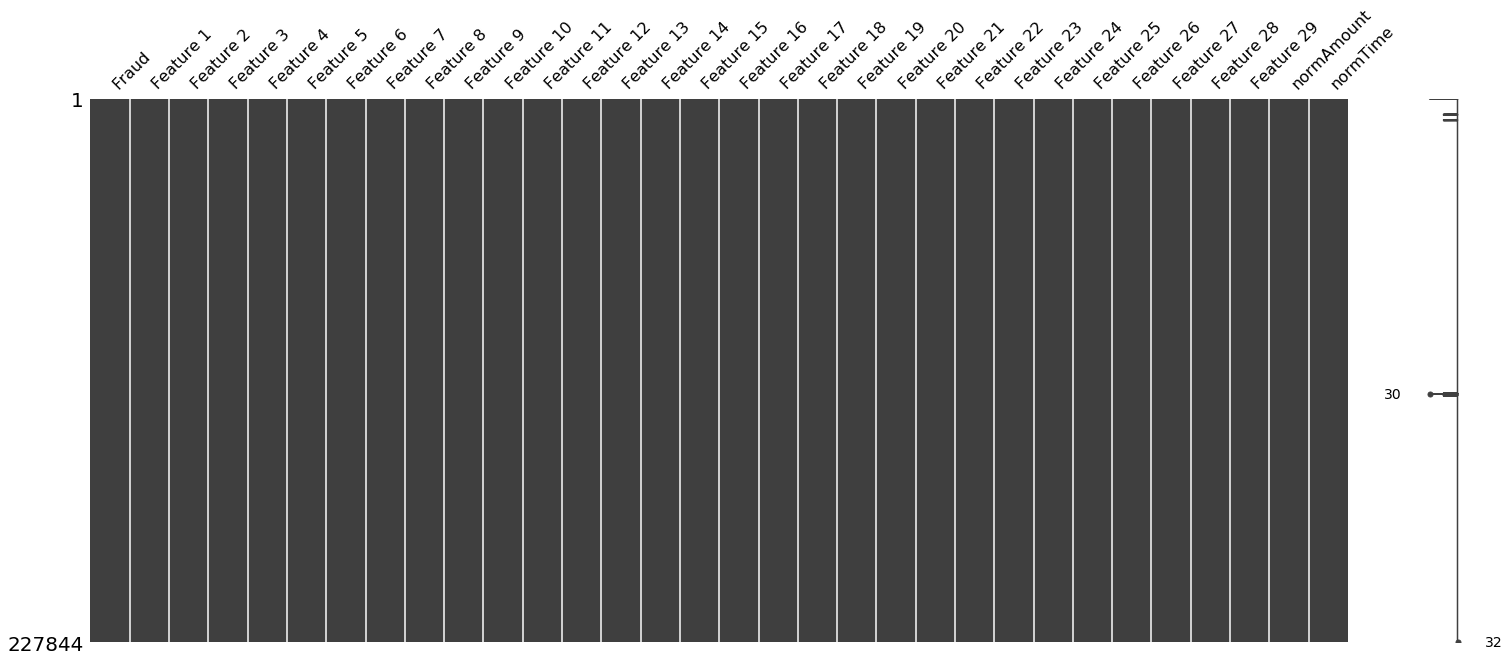

In [82]:
#Missing Values Pattern Analysis using missingno
msno.matrix(df)

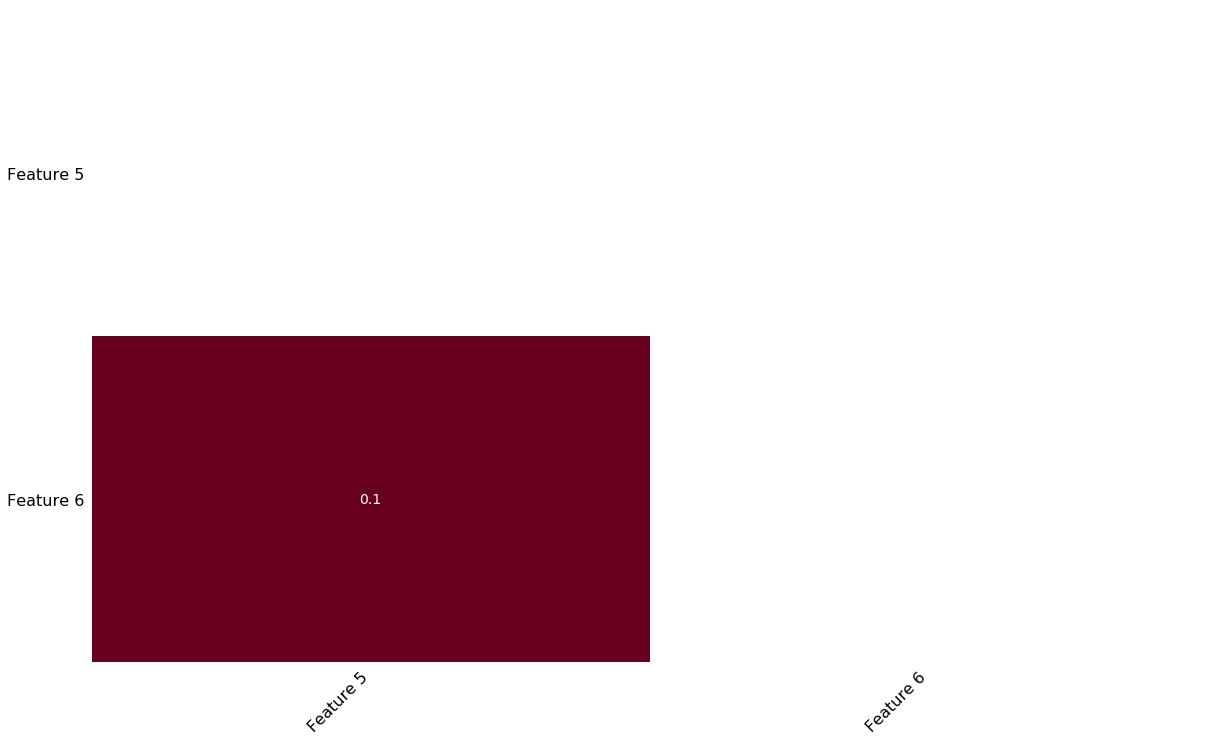

In [83]:
#Visualise the Correleation Matrix about the locations of missing values in columns 
msno.heatmap(df)

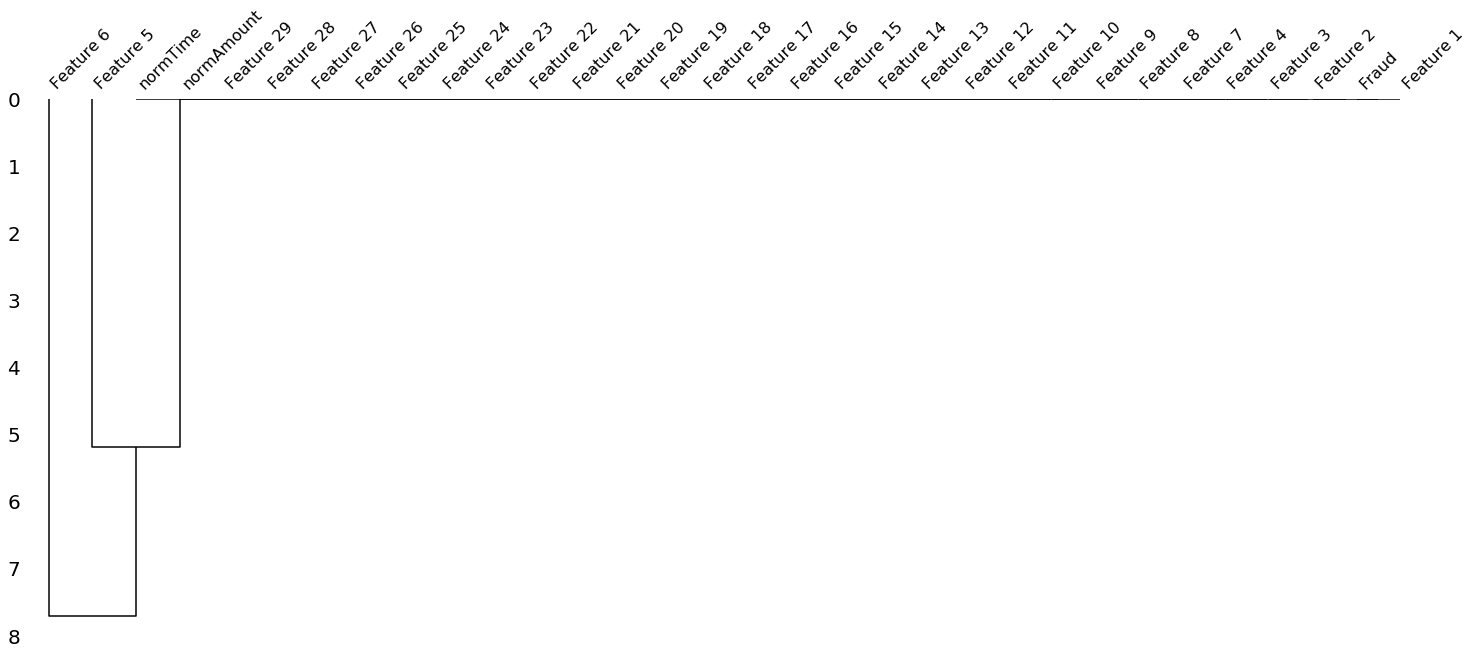

In [84]:
msno.dendrogram(df)

Interpreting Dendrogram:

The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

In this specific example the dendrogram glues together the variables which are required and therefore present in every record. The height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

Analysis:

There is a relationship between normAmount and the missing values for Feature 5. There is also a relationship between missing values for Feature 5 and Feature 6. 

The question here is whether the missing values are missing completely at random (MCAR), missing at random (MAR) or missing not at random (MNAR). In this case, we can notice that the missing values are definitely NOT missing completely at random since there is an association between the missing values and the observed variabels. However, as the features details are not known (only know Feature 1, 2, 3 etc), we cannot distinguish whether the missing values are Missing at Random (MAR) or Missing Not at Random (MNAR). We will continue to use multiple imputation to fill in the missing values as this is the most appropriate method.

In [85]:
#Use sklearn Impute to impute missing values
features = df.values
imp = SimpleImputer(missing_values = np.nan, strategy='mean')

#Only feature 5 and feature 6 have NaN
features[:,[5,6]] = imp.fit_transform(features[:,[5,6]])

df1 = pd.DataFrame(features)
df1.columns = df.columns
df = df1
df[df.isnull().any(axis=1)]

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime


In [86]:
#Get difference in means between Fraud and not-fraud
df.groupby('Fraud').mean()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime
Fraud,,,,,,,,,,,,,,,,,,,,,
0.0,0.049387,0.002841,0.028799,-0.018164,-0.008677,0.009279,-0.007071,-0.022976,-0.009824,0.001263,...,0.002776,0.026436,0.045807,0.016831,-0.032826,0.068994,0.009538,0.007167,-0.000255,0.000545
1.0,-0.098209,-4.559229,-7.423533,-2.589217,0.761240,0.371774,0.765659,0.013088,-0.060036,-0.083433,...,0.663762,0.613894,-7.024019,-0.048627,-6.685076,4.046820,-6.135121,-2.696376,0.139044,-0.297025


In [87]:
#Get number of fraud and not fraud values
fraud_rows = df['Fraud'].value_counts()
total_rows = df.shape[0]
percentage_fraud = fraud_rows[1]/total_rows

print("Fraud rows: ", fraud_rows[1])
print("Total rows: ", total_rows)
print("Percentage rows: ", percentage_fraud)

Fraud rows:  417
Total rows:  227844
Percentage rows:  0.0018301996102596514


# Check for Duplicates

In [88]:
df[df.duplicated()==True]

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime


There are no duplicates. So we can move on.

# Exploratory Data Analysis for Feature Selection

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib

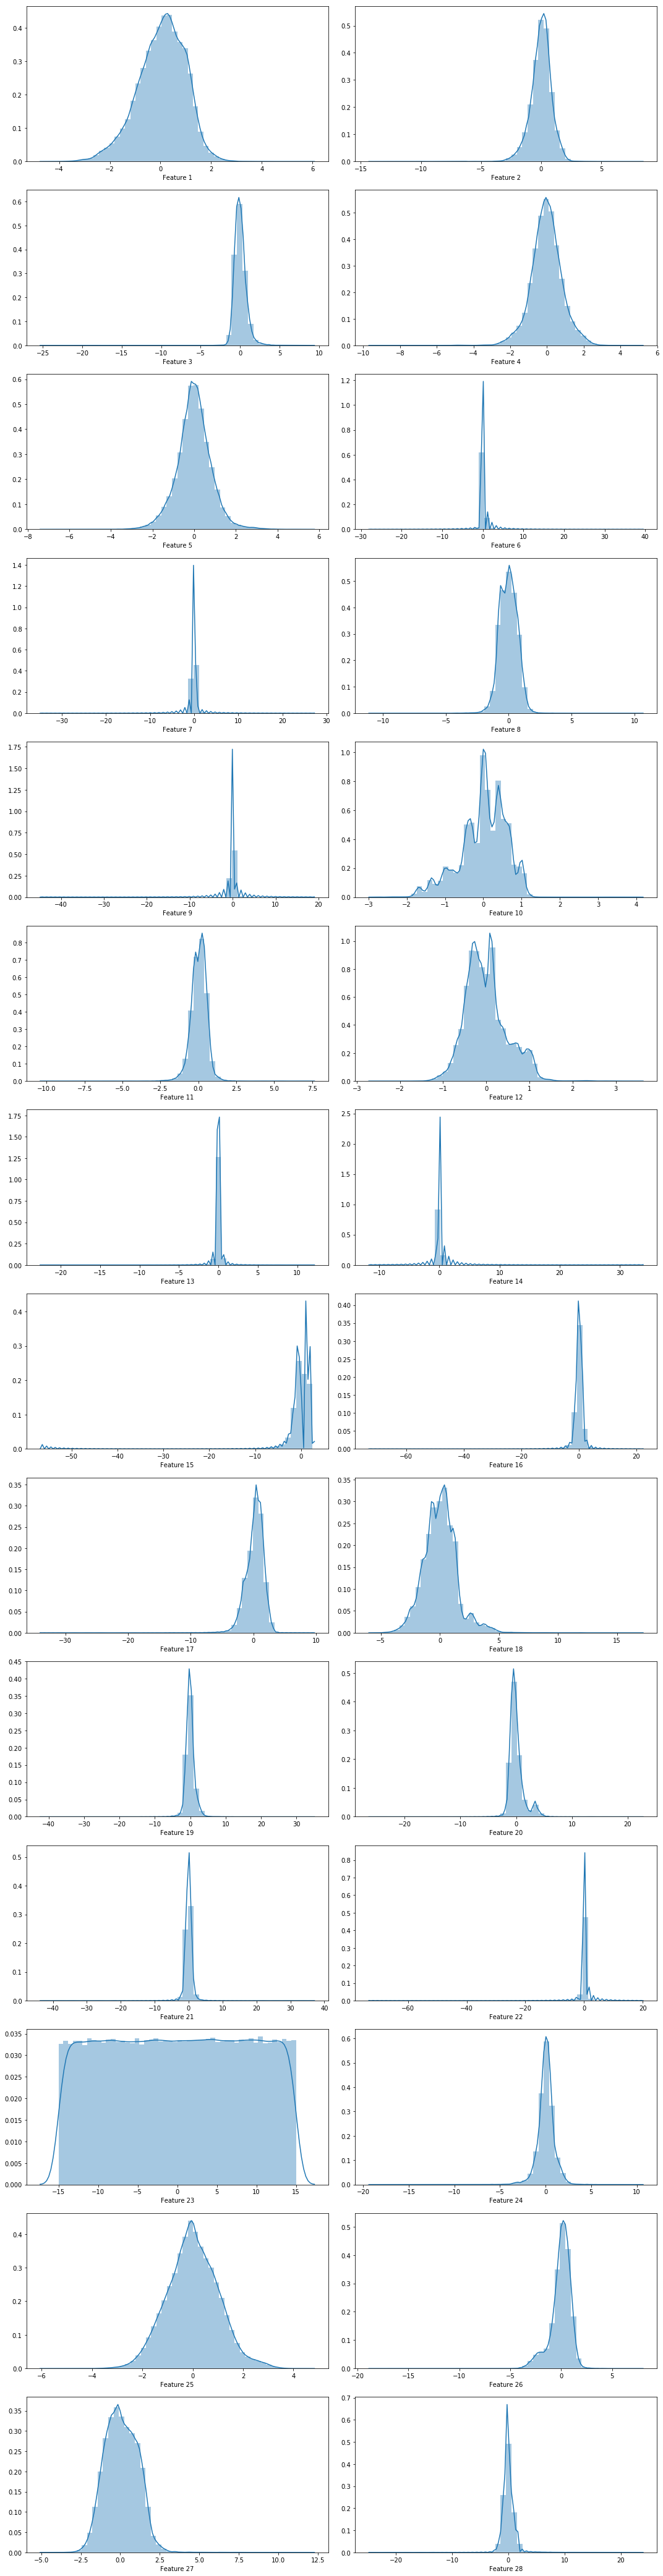

In [89]:
V = df[[col for col in df.columns if 'Feature' in col]]

f, ax = plt.subplots(ncols = 2, nrows = 14, figsize=(15,2*len(V.columns)))


for i, c in zip(ax.flatten(), V.columns):
    sns.distplot(V[c], ax = i)

f.tight_layout()

In [90]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)

df_norm = pd.DataFrame(np_scaled, columns = df.columns)

df_norm.head()

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime
0,0.0,0.577952,0.609260,0.737173,0.655066,0.594863,0.419113,0.561184,0.522992,0.700467,...,0.786444,0.286681,0.635591,0.463328,0.680908,0.252484,0.510600,0.475312,0.007612,0.000000
1,0.0,0.497308,0.650934,0.727794,0.640681,0.551930,0.414361,0.557840,0.480237,0.703785,...,0.786298,0.959548,0.641219,0.606220,0.744342,0.381188,0.505267,0.453981,0.000137,0.000000
2,0.0,0.662961,0.501334,0.763381,0.644945,0.386683,0.423170,0.565477,0.546030,0.716450,...,0.788042,0.149482,0.640473,0.628245,0.706683,0.322422,0.513018,0.410603,0.019264,0.000007
3,0.0,0.374593,0.582978,0.711253,0.788492,0.467058,0.412300,0.559734,0.510277,0.699216,...,0.789434,0.598698,0.636372,0.608021,0.710910,0.271817,0.507585,0.414999,0.006283,0.000007
4,0.0,0.452712,0.610105,0.724243,0.650665,0.626060,0.421444,0.561327,0.547271,0.700044,...,0.782484,0.591708,0.608406,0.688911,0.724477,0.236355,0.524303,0.490950,0.003561,0.000014


In [91]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 417 rows.
fraud_df = df.loc[df['Fraud'] == 1]
non_fraud_df = df.loc[df['Fraud'] == 0][:417]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime
225460,0.0,-1.792774,-0.258614,0.204568,0.933327,1.982035,0.444664,0.120674,0.924374,-0.415875,...,0.554070,7.150025,-1.460298,0.871799,0.634364,-0.387321,1.217982,-0.615806,-0.302013,1.650787
43274,0.0,0.579624,-0.214452,-0.485495,-0.593524,-1.192106,-0.029557,0.067341,0.352713,-0.408705,...,-0.251639,-3.918464,-0.042872,0.353502,0.132238,-0.204515,-0.616834,-0.645091,-0.310675,-0.951774
6717,1.0,-2.086989,-2.442354,-3.535524,0.130360,-2.071450,0.576656,0.615642,-0.406427,-0.737018,...,0.561257,0.312925,-11.736729,-0.379315,-10.475229,7.388055,-7.454841,-3.796354,-0.358579,-1.787957
152556,0.0,0.149985,0.722640,0.102913,0.468685,-0.454432,-0.269126,-0.134502,-0.042025,0.320729,...,0.006604,-8.471448,1.301308,0.857757,-2.741926,-0.231854,-0.360923,2.831590,-0.302891,0.464907
150925,1.0,-1.570007,-12.172553,-20.164542,-8.668815,2.550870,0.694574,-0.907906,1.514028,-0.141879,...,0.040349,-7.027271,-6.552554,-0.169044,-14.175030,5.934657,-15.123752,-5.620232,-0.181017,0.382185


### Correlation Matrix

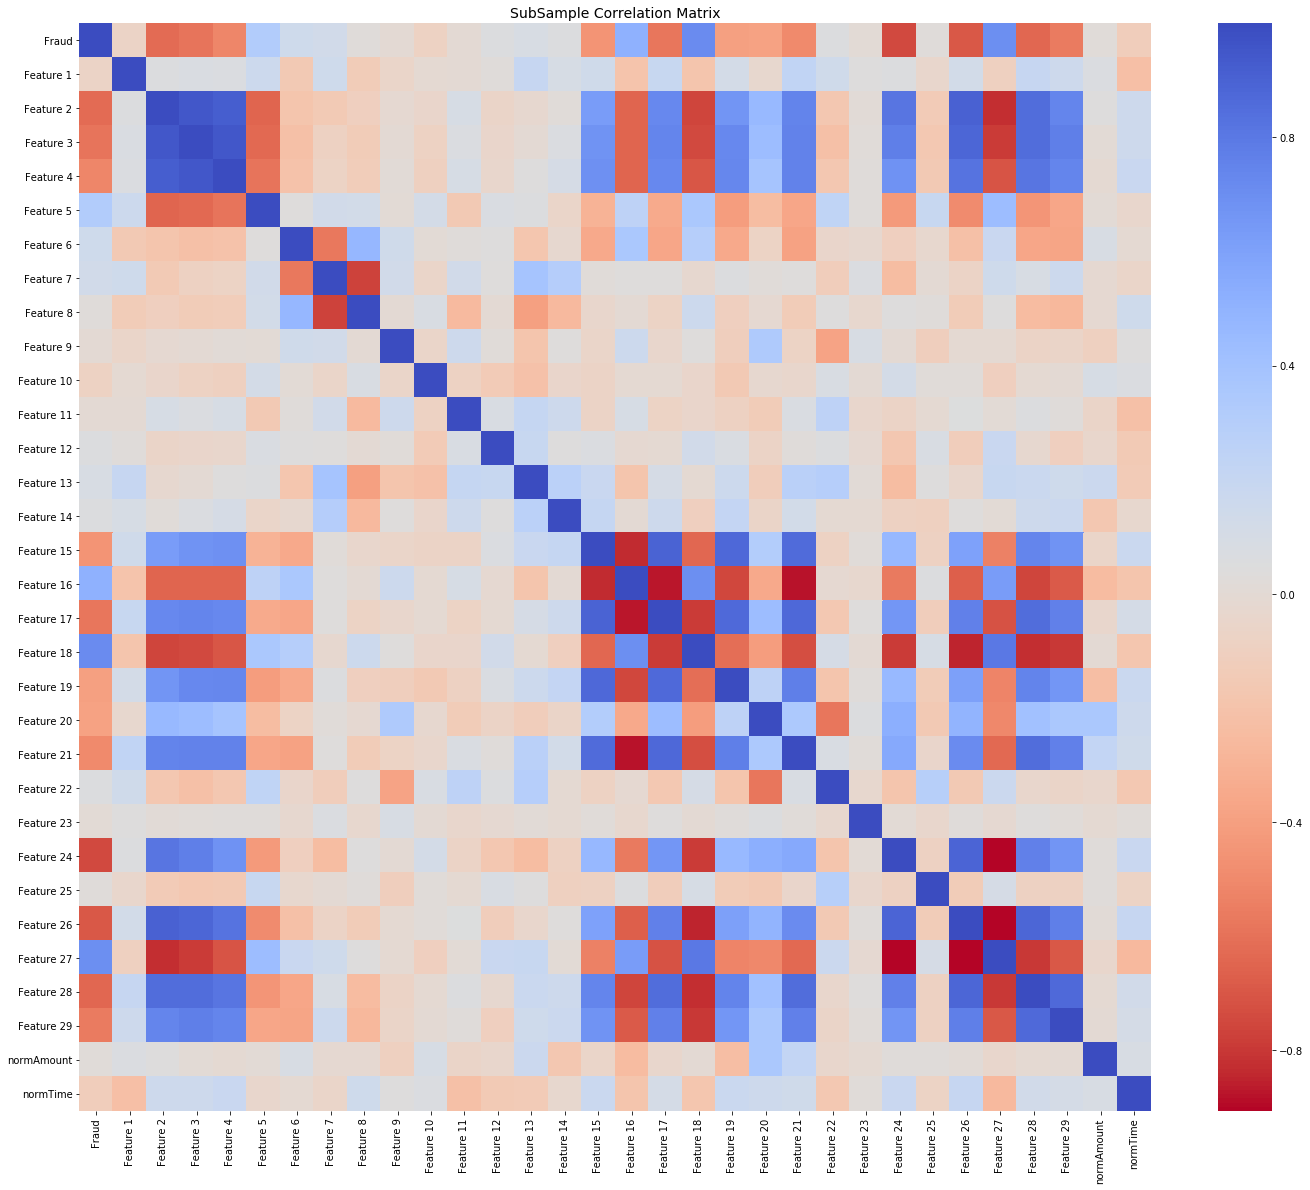

In [95]:
# Shuffle dataframe rows
df_sample = normal_distributed_df.sample(frac=1, random_state=42)

f, ax1 = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = df_sample.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

We can see below that all features have very low correlation with the 'Fraud' feature. This was already expected since the data was processed using PCA.

<b>Negative Correlations</b>: Features (7 and 8), (15 and 16), (16 and 17), (16 and 21), (24 and 27), (26 and 27) are negatively correlated. <br/>
<b>Positive Correlations</b>:Features (2,3, and 4), (2 and 26), (15 and 21) are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

So now we will be removing features 7, 16, 27, 2, 21

In [96]:
normal_distributed_df.drop(['Feature 2', 'Feature 3', 'Feature 7', 'Feature 16', 'Feature 18', 'Feature 21', 'Feature 27'], axis=1, inplace=True)
df.drop(['Feature 2', 'Feature 3', 'Feature 7', 'Feature 16', 'Feature 18', 'Feature 21', 'Feature 27'], axis=1, inplace=True)

# T-SNE

In [97]:
# New_df is from the random undersample data (fewer instances)
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

X = new_df.drop('Fraud', axis=1)
y = new_df['Fraud']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 9.6 s


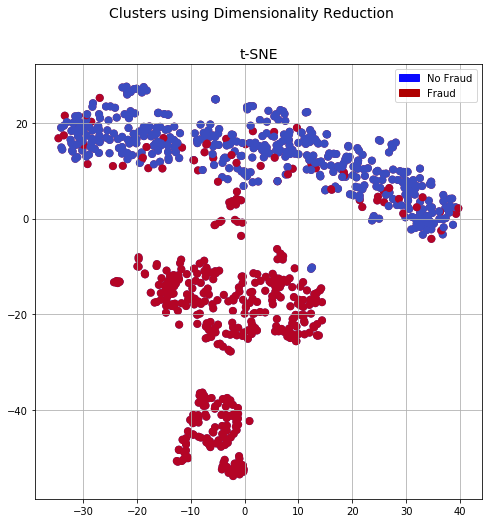

In [98]:
f, ax1 = plt.subplots(1, 1, figsize=(8,8))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

plt.show()

# Random Forest 

In [99]:
y_small = normal_distributed_df['Fraud']
X_small = normal_distributed_df.drop('Fraud', axis=1)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, train_size=0.7, random_state=0)

y = df['Fraud']
X = df.drop('Fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [100]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=17,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy')

# Perform SFFS
sfs1 = sfs1.fit(X_train_small, y_train_small)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   42.7s finished

[2019-03-17 16:09:42] Features: 1/17 -- score: 0.8765663322185061[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [101]:
# Get the features that were selected as predictors
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[20]


In [ ]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

In [ ]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Therefore, we will be moving forward with these features only

In [ ]:
X_train = X_train.iloc[:, feat_cols]
X_test = X_test.iloc[:, feat_cols]

# Data Resampling

In [ ]:
#Function to plot data. Will be used later
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [ ]:
method = SMOTE(kind='regular')

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [ ]:
plot_data(X_resampled, y_resampled)
type(X_resampled)

In [ ]:
print("Before resampling")
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print("After resampling")
print(pd.value_counts(pd.Series(y_resampled)))

# Models to detect Fraud

### Using Decision Tree 

In [ ]:
model_dt = DecisionTreeClassifier(random_state=5)

# Fit the model to our resampled dataset
model_dt.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model_dt.predict(X_test)

# Print the accuracy performance metric
# print(accuracy_score(y_test, predicted))

# Predict probabilities
probs = model_dt.predict_proba(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

### Random Forest

Random Forest before resampling:

In [36]:
model_rf = RandomForestClassifier(random_state=5)

# Fit the model to our resampled dataset
model_rf.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model_rf.predict(X_test)

# Print the accuracy performance metric
# print(accuracy_score(y_test, predicted))

# Predict probabilities
probs = model_rf.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9124292188631001
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     65831
         1.0       0.94      0.70      0.80        86

   micro avg       1.00      1.00      1.00     65917
   macro avg       0.97      0.85      0.90     65917
weighted avg       1.00      1.00      1.00     65917

[[65827     4]
 [   26    60]]
F SCORE 0.8000000000000002


Random Forest after resampling

In [37]:
# Define the model as the random forest
model_rf_re = RandomForestClassifier(random_state=5)

# Fit the model to our resampled dataset
model_rf_re.fit(X_resampled, y_resampled)

# Obtain predictions from the test data 
predicted = model_rf_re.predict(X_test)

# Predict probabilities
probs = model_rf_re.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9276659084413824
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     65831
         1.0       0.92      0.77      0.84        86

   micro avg       1.00      1.00      1.00     65917
   macro avg       0.96      0.88      0.92     65917
weighted avg       1.00      1.00      1.00     65917

[[65825     6]
 [   20    66]]
F SCORE 0.8354430379746837


<div class="alert alert-success">
    Out of all the models employed, we will be using this one as it provides the best F score
</div>

## Plot learning curve

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


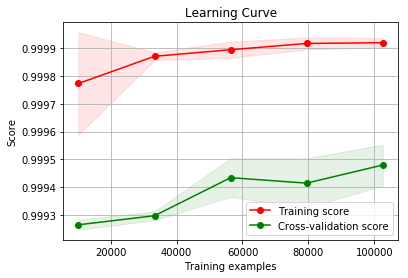

In [43]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title= "Learning Curve"
plot_learning_curve(model_rf, title, X_train, y_train)

plt.show()

From the learning curve, we can see that the bias-variance trade-off is not very bad and we'll continue with this model